In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("SampleSuperstore.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 13)

In [6]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
aa = data.drop(['Country','Postal Code'], axis=1)

In [10]:
aa.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
aa.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


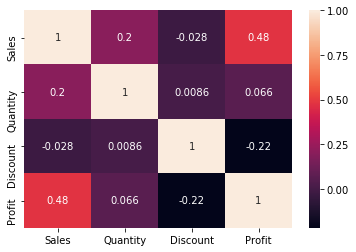

In [23]:
corelation = aa.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

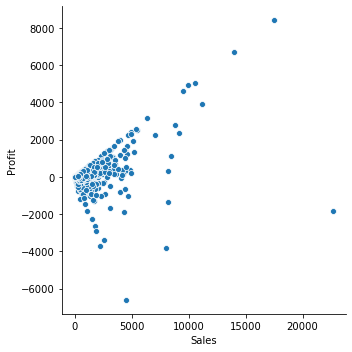

In [22]:
sns.relplot(x='Sales',y='Profit',data=aa)

In [13]:
statesales = aa.groupby('State')['Sales'].sum().sort_values(ascending=False)
statesales

State
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

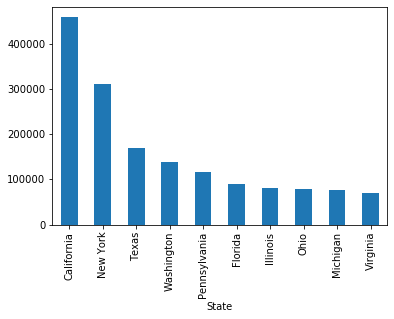

In [14]:
statesales[:10].plot(kind = 'bar')

In [15]:
catstate = aa[['State','Category','Sales']]
catstate.head()

,State,Category,Sales
0,Kentucky,Furniture,261.9600
1,Kentucky,Furniture,731.9400
2,California,Office Supplies,14.6200
3,Florida,Furniture,957.5775
4,Florida,Office Supplies,22.3680


In [16]:
bb=catstate.groupby(['State','Category']).sum()
bb.head()

Sales
State   Category                  
Alabama Furniture         6332.480
        Office Supplies   4209.080
        Technology        8969.080
Arizona Furniture        13525.291
        Office Supplies  10005.825

In [17]:
bb.unstack().head()

Sales                            
Category      Furniture Office Supplies  Technology
State                                              
Alabama       6332.4800        4209.080    8969.080
Arizona      13525.2910       10005.825   11750.885
Arkansas      3187.5500        4565.330    3925.250
California  156064.6015      142351.948  159271.082
Colorado     13243.0370        7898.752   10966.329

Text(0, 0.5, 'Sales')

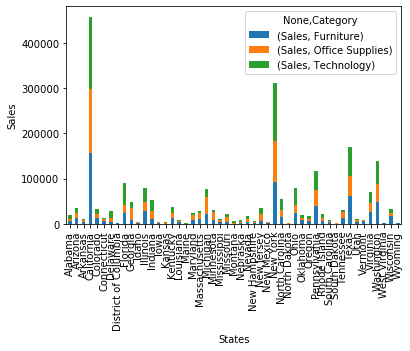

In [18]:
cc= bb.unstack().plot(kind='bar',stacked=True)
cc.set_xlabel("States")
cc.set_ylabel("Sales")

In [19]:
segmentsales = aa.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segmentsales

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

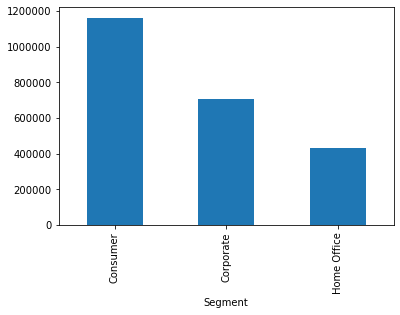

In [20]:
segmentsales.plot(kind='bar')